# Day 10: Data

- Data Ecosystem
- Data use-cases
- Data Exploration and analytics (numpy, pandas)
- Data Visualization (seaborn, matplotlib)
- ML/DL

## Data Ecosystem

- Jupyter notebook (ipython)
- scipy (scientific python)
- numpy
- pandas
- matplotlib
- seaborn
- sklearn (ML)
- tf/keras(google), pytorch(meta) (DL)

## Data use-cases

- Data Cleaning
- (2-D) Data Exploration & Analytics
- Feature Engineering
- ML/DL

In [1]:
import pandas as pd

In [3]:
tips = pd.read_csv('../data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
type(tips)

pandas.core.frame.DataFrame

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [7]:
tips['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [8]:
type(tips['tip'])

pandas.core.series.Series

In [9]:
tips.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [10]:
tips.tip + tips.total_bill      # vectorized/mapped operations

0      18.00
1      12.00
2      24.51
3      26.99
4      28.20
       ...  
239    34.95
240    29.18
241    24.67
242    19.57
243    21.78
Length: 244, dtype: float64

In [12]:
tips.tip + 10

0      11.01
1      11.66
2      13.50
3      13.31
4      13.61
       ...  
239    15.92
240    12.00
241    12.00
242    11.75
243    13.00
Name: tip, Length: 244, dtype: float64

In [13]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [16]:
tips.tip > 2

0      False
1      False
2       True
3       True
4       True
       ...  
239     True
240    False
241    False
242    False
243     True
Name: tip, Length: 244, dtype: bool

In [17]:
tips[tips.tip > 2]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [18]:
tips[tips.tip > 2].total_bill

2      21.01
3      23.68
4      24.59
5      25.29
7      26.88
       ...  
232    11.61
234    15.53
238    35.83
239    29.03
243    18.78
Name: total_bill, Length: 166, dtype: float64

In [22]:
tips.tip.sum()
tips.tip.mean()
tips.tip.max()
tips.tip.std()

1.3836381890011826

In [26]:
tips.sex.sum()
# tips.sex.mean()
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [31]:
# Average total bill amt for tips greater than 2
tips[tips.tip < 2].total_bill.mean()

12.207333333333334

In [34]:
# Average tip for bill amounts greater or equal to 20
tips[tips.total_bill >= 20].tip.mean()

3.929484536082474

In [37]:
# Average tip paid by females
tips[tips.sex == 'Female'].tip.mean()
tips[tips.sex == 'Male'].tip.mean()

3.0896178343949043

In [36]:
# Maximum tip on Saturday
tips[tips.day == 'Sat'].tip.max()

10.0

In [42]:
tips.groupby('sex').tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [ ]:
# select sex, smoker, AVERAGE(TIP), MAX(TOTAL_BILL) in tips group by sex,smoker;

In [44]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [45]:
# Max tip for all days of the week
tips.groupby('day').tip.max()

day
Fri      4.73
Sat     10.00
Sun      6.50
Thur     6.70
Name: tip, dtype: float64

In [46]:
tips.groupby(['day', 'time']).tip.max()

day   time  
Fri   Dinner     4.73
      Lunch      3.48
Sat   Dinner    10.00
Sun   Dinner     6.50
Thur  Dinner     3.00
      Lunch      6.70
Name: tip, dtype: float64

In [49]:
tips.groupby('day')[['tip','total_bill']].max()

,tip,total_bill
day,,
Fri,4.73,40.17
Sat,10.00,50.81
Sun,6.50,48.17
Thur,6.70,43.11


In [50]:
tips.groupby(['day','time'])[['tip','total_bill']].max()

tip  total_bill
day  time                     
Fri  Dinner   4.73       40.17
     Lunch    3.48       16.27
Sat  Dinner  10.00       50.81
Sun  Dinner   6.50       48.17
Thur Dinner   3.00       18.78
     Lunch    6.70       43.11

In [ ]:
tips.groupby(['day','time'])[['tip','total_bill']].agg(

In [51]:
g = tips.groupby(['day','time'])[['tip','total_bill']]
g

In [52]:
import numpy as np

In [55]:
# g.agg({'tip': np.max, 'total_bill': np.std})
g.agg({'tip': 'max', 'total_bill': 'std'})

tip  total_bill
day  time                     
Fri  Dinner   4.73    9.471753
     Lunch    3.48    2.842228
Sat  Dinner  10.00    9.480419
Sun  Dinner   6.50    8.832122
Thur Dinner   3.00         NaN
     Lunch    6.70    7.950334

In [58]:
type(tips.tip.values)

numpy.ndarray

## Data Visualization

<Axes: xlabel='sex'>

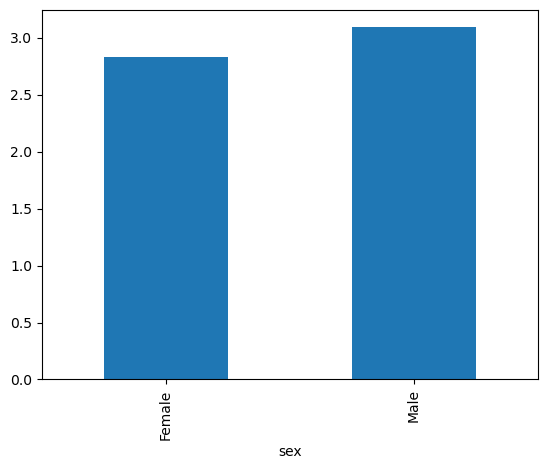

In [61]:
tips.groupby('sex').tip.mean().plot(kind='bar')

In [64]:
tips.groupby(['day', 'time']).tip.mean()

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

In [66]:
tips.groupby(['day', 'time']).tip.mean().unstack().fillna(0)

time,Dinner,Lunch
day,,
Fri,2.940000,2.382857
Sat,2.993103,0.000000
Sun,3.255132,0.000000
Thur,3.000000,2.767705


<Axes: xlabel='day'>

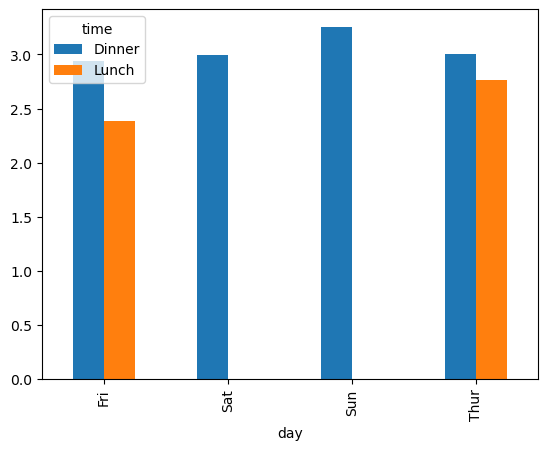

In [67]:
tips.groupby(['day', 'time']).tip.mean().unstack().fillna(0).plot(kind='bar')

In [68]:
import seaborn as sns

<Axes: xlabel='total_bill', ylabel='tip'>

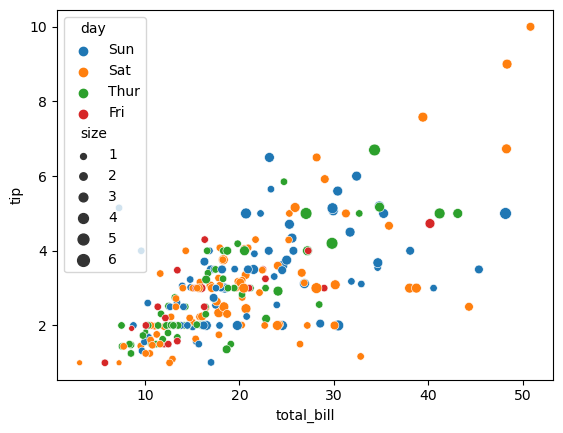

In [71]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', size='size')

<Axes: >

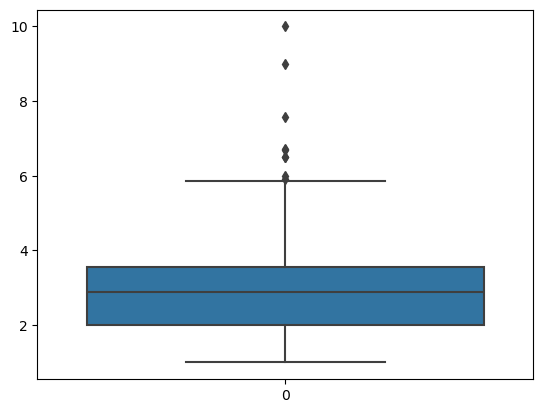

In [72]:
sns.boxplot(tips.tip)

<Axes: >

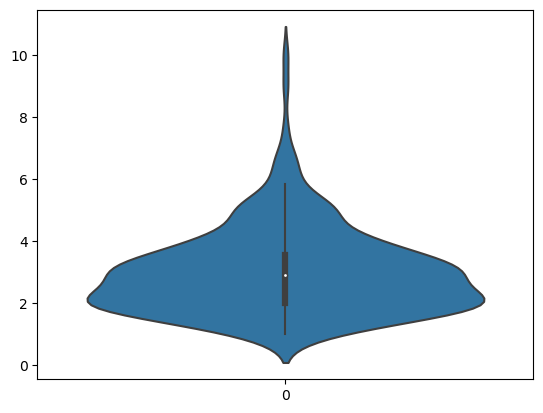

In [73]:
sns.violinplot(tips.tip)

In [74]:
import matplotlib.pyplot as plt

In [75]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [78]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors=20)
knn

KNeighborsClassifier(n_neighbors=20)

In [80]:
y = tips.pop('sex')
y

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: object

In [81]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [82]:
knn.fit(tips, y)

ValueError: could not convert string to float: 'No'

In [85]:
X = pd.get_dummies(tips)    # One Hot encoding
X

,total_bill,tip,size,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,False,False,True,False,True,False
1,10.34,1.66,3,True,False,False,False,True,False,True,False
2,21.01,3.50,3,True,False,False,False,True,False,True,False
3,23.68,3.31,2,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,False,True,False,False,True,False
240,27.18,2.00,2,False,True,False,True,False,False,True,False
241,22.67,2.00,2,False,True,False,True,False,False,True,False
242,17.82,1.75,2,True,False,False,True,False,False,True,False


In [92]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [93]:
ypred = knn.predict(X)
ypred

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
      

In [94]:
(ypred == y).sum() / len(y) * 100     # Accuracy

67.62295081967213

In [ ]:
knn = KNeighborsClassifier()
y = tips.pop('sex')
X = pd.get_dummies(tips)
# train_test_split
knn.fit(X, y)           # training
knn.predict(Xunseen)    # testing

## Regular Expression

In [95]:
import re

In [96]:
re.findall(r'\w+@\w+\.\w+', 'my email id is u98106@gmail.com.')

['u98106@gmail.com']